In [2]:
import numpy as np
import pandas as pd
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Statistical analysis
from scipy import stats

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional interactive visualizations
import plotly.express as px
import plotly.graph_objects as go

# Optional statistical modeling
import statsmodels.api as sm

# Setting up visualization styles
plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(10, 6)})

C:\Users\ABC\AppData\Local\Temp\ipykernel_14620\1364487706.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [3]:
df = pd.read_csv("Financial Analytics data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [5]:
df.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,488.000000,479.000000,459.000000
mean,251.508197,28043.857119,3807.789412
std,145.884078,59464.615831,9989.449987
min,1.000000,3017.070000,0.000000
25%,122.750000,4843.575000,534.910000
50%,252.500000,9885.050000,1137.170000
75%,378.250000,23549.900000,2730.195000
max,500.000000,583436.720000,110666.930000


In [6]:
df.isnull().sum()

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
# Fill missing values with median for numerical columns
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].median(), inplace=True)
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].median(), inplace=True)

# Drop rows with any remaining missing values (if any)
df.dropna(inplace=True)

In [11]:
# Define a function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Market Capitalization
outliers_mar_cap = detect_outliers(df, 'Mar Cap - Crore')

# Detect outliers in Quarterly Sales
outliers_sales_qtr = detect_outliers(df, 'Sales Qtr - Crore')

# Optionally, remove outliers
df = df[~df.index.isin(outliers_mar_cap.index)]
df = df[~df.index.isin(outliers_sales_qtr.index)]

In [12]:
# Summary statistics for numerical columns
df[['Mar Cap - Crore', 'Sales Qtr - Crore']].describe()

,Mar Cap - Crore,Sales Qtr - Crore
count,401.000000,401.000000
mean,11124.183167,1198.730025
std,9432.587139,1046.853529
min,3017.070000,0.000000
25%,4369.690000,473.770000
50%,7550.780000,865.770000
75%,13743.950000,1497.930000
max,48577.430000,5498.450000


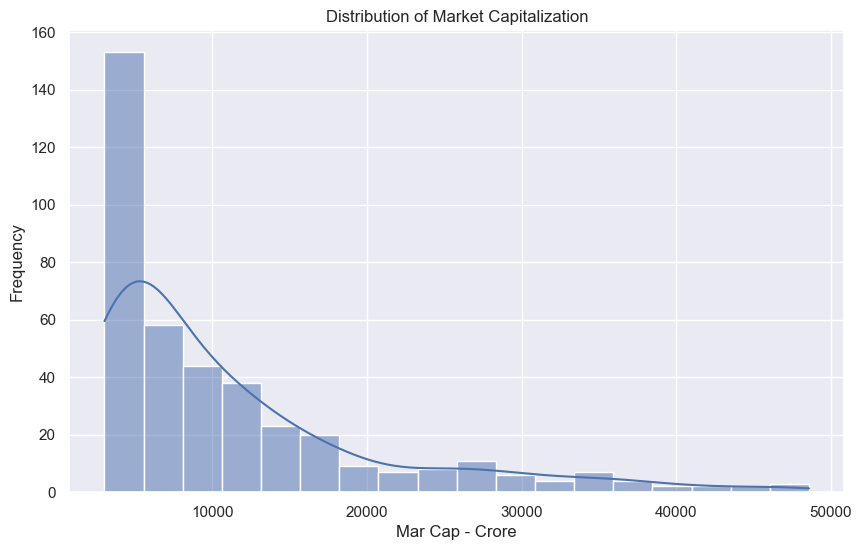

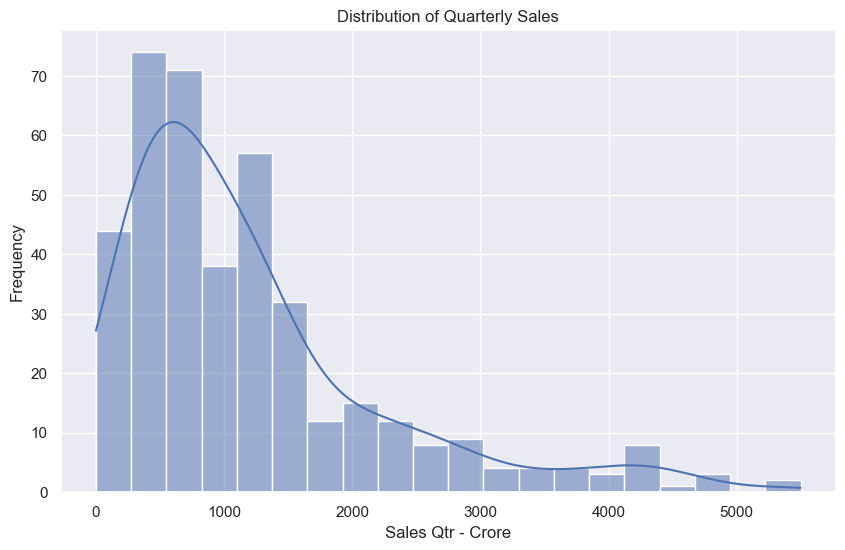

In [13]:
# Distribution plot for Market Capitalization
sns.histplot(df['Mar Cap - Crore'], kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Mar Cap - Crore')
plt.ylabel('Frequency')
plt.show()

# Distribution plot for Quarterly Sales
sns.histplot(df['Sales Qtr - Crore'], kde=True)
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Sales Qtr - Crore')
plt.ylabel('Frequency')
plt.show()


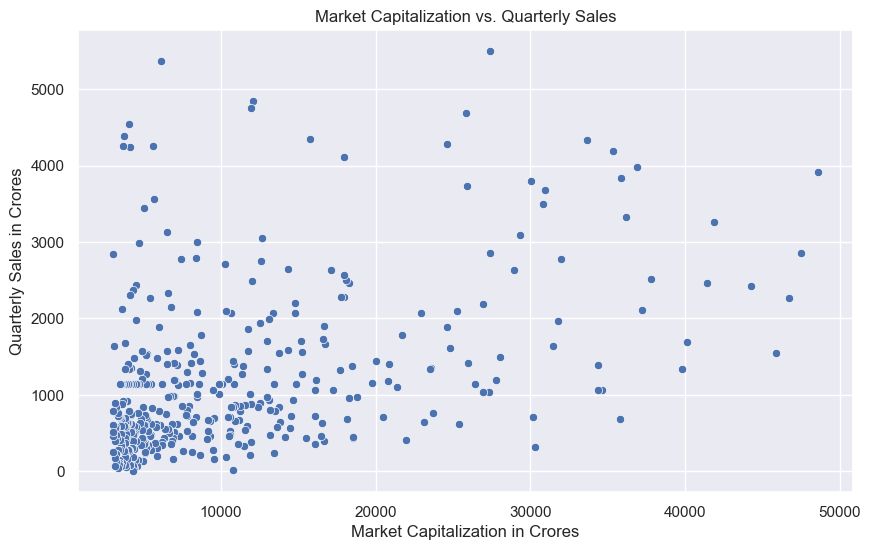

C:\Users\ABC\AppData\Local\Temp\ipykernel_14620\26139683.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


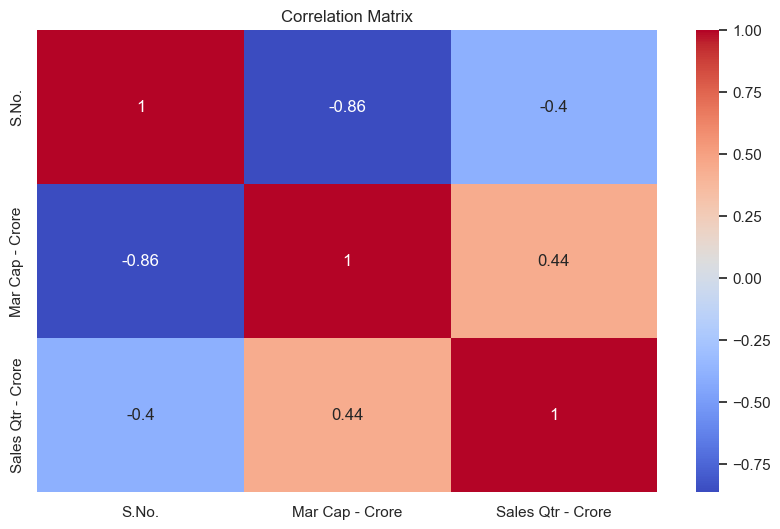

In [14]:
# Scatter plot of Market Capitalization vs. Quarterly Sales
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.title('Market Capitalization vs. Quarterly Sales')
plt.xlabel('Market Capitalization in Crores')
plt.ylabel('Quarterly Sales in Crores')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Calculate additional metrics if needed, e.g., Market Share
total_market_cap = df['Mar Cap - Crore'].sum()
df['Market Share (%)'] = (df['Mar Cap - Crore'] / total_market_cap) * 100

# Top 10 companies by Market Capitalization
top_companies = df.nlargest(10, 'Mar Cap - Crore')
top_companies[[ 'Mar Cap - Crore', 'Sales Qtr - Crore']]


,Mar Cap - Crore,Sales Qtr - Crore
64,48577.43,3913.82
65,47483.97,2858.36
66,46725.05,2263.30
67,45855.50,1542.90
68,44239.04,2429.50
69,41876.19,3259.60
70,41415.33,2469.03
71,40159.35,1693.72
72,39813.84,1337.59
74,37776.23,2512.82


In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 64 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              401 non-null    int64  
 1   Name               401 non-null    object 
 2   Mar Cap - Crore    401 non-null    float64
 3   Sales Qtr - Crore  401 non-null    float64
 4   Market Share (%)   401 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 18.8+ KB
